------------------------
#### Embedding models in OpenAI (GPTs)
----------------------------

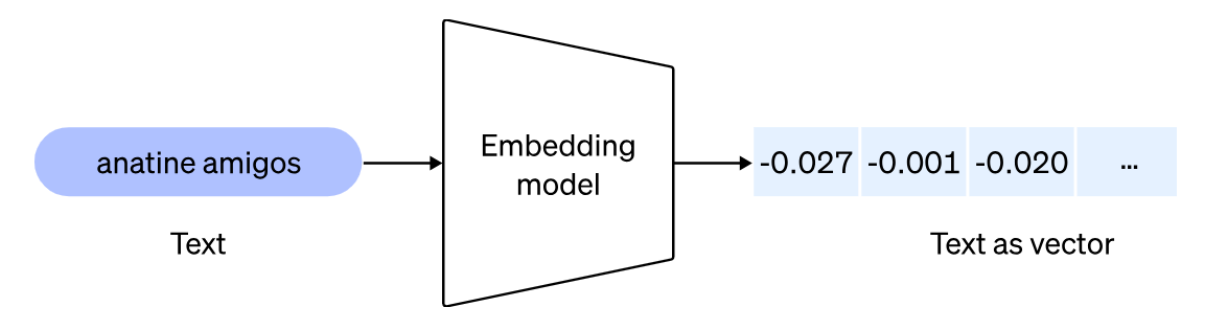

In [11]:
import openai
import os
import numpy as np

In [2]:
api_key = os.getenv("OPENAI_API_KEY")

In [4]:
from openai import OpenAI

In [5]:
client = OpenAI()

In [6]:
response = client.embeddings.create(
                input = "my name is bhupen",
                model = 'text-embedding-ada-002'
            )

In [10]:
len(response.data[0].embedding)

1536

In [13]:
print(np.array(response.data[0].embedding))

[-0.0237875   0.00649044  0.00832174 ... -0.04312293 -0.00437118
 -0.02743716]


Example - 01

In [14]:
# Define the dummy text sentences
dummy_text_sentences = [
    "fish",
    "crab",
    "Machine Learning",
]

In [15]:
embeddings = []

for sentence in dummy_text_sentences:
    response = client.embeddings.create(
                input = sentence,
                model = 'text-embedding-3-small'
            )
    embedding = response.data[0].embedding

    embeddings.append(embedding)

In [16]:
len(embeddings)

3

find out the similarities in the embeddings

In [18]:
def cosine_sim(emb1, emb2):
    cos_sim = np.dot(emb1, emb2)/(np.linalg.norm(emb1) * np.linalg.norm(emb2))

    return cos_sim

In [23]:
# Get the cosine similarity scores for all pairs of embeddings
similarity_scores = []

similarity_scores_dict = {}
similarity_scores_dict_list = []

for i in range(len(embeddings)):
    for j in range(len(embeddings)):
        if i != j:
            similarity_score = cosine_sim(np.array(embeddings[i]), np.array(embeddings[j]))
            similarity_scores.append(similarity_score)
            similarity_scores_dict[(i,j)] = similarity_score
            similarity_scores_dict_list.append(similarity_scores_dict)
            similarity_scores_dict ={}

In [24]:
for similarity_score in similarity_scores:
    print(similarity_score)

0.3821386686216191
0.07038307456805208
0.3821386686216191
0.06616262713452593
0.07038307456805208
0.06616262713452593


In [25]:
similarity_scores_dict_list

[{(0, 1): 0.3821386686216191},
 {(0, 2): 0.07038307456805208},
 {(1, 0): 0.3821386686216191},
 {(1, 2): 0.06616262713452593},
 {(2, 0): 0.07038307456805208},
 {(2, 1): 0.06616262713452593}]

In [26]:
dummy_text_sentences = [
    "fish",
    "crab",
    "Machine Learning",
]

Exercise - 02

In [28]:
import openai, os
import numpy as np

# calculates the cosine distance (1 - cosine similarity).
from scipy.spatial.distance import cosine

In [29]:
def get_embedding(text, model="text-embedding-ada-002"):
    
    response = client.embeddings.create(
                              input= text,
                              model= model
    )
    return np.array(response.data[0].embedding)

In [51]:
# Define a set of documents (e.g., knowledge base or FAQ)
documents = [
    "Python is a high-level programming language used for web development, data analysis, machine learning, and more.",
    "JavaScript is a versatile scripting language commonly used for web development to create dynamic web pages.",
    "Machine learning is a subset of artificial intelligence that allows systems to learn and improve from experience.",
    "Data science combines various fields including statistics, computer science, and domain knowledge to extract insights from data.",
    "A neural network is a computational model used in deep learning to simulate the behavior of a human brain.",
    "The rainforest is home to thousands of species of plants and animals, creating a rich and diverse ecosystem.",
    "The ancient ruins in Greece attract millions of tourists each year who marvel at their historical significance and architectural beauty.",
    "Cooking a delicious pasta dish requires a balance of spices, fresh ingredients, and precise timing to bring out the best flavors."
]

In [52]:
# Define the user query
query = "What is machine learning?"

In [53]:
# Generate embeddings for the query and each document
query_embedding     = get_embedding(query)

In [54]:
query_embedding

array([-0.02196411, -0.0088488 ,  0.0089777 , ..., -0.02267304,
       -0.02340776, -0.01849677])

In [55]:
# and each document
document_embeddings = [get_embedding(doc) for doc in documents]

In [56]:
len(document_embeddings)

8

In [57]:
document_embeddings[0].shape

(1536,)

In [58]:
document_embeddings[1].shape

(1536,)

In [59]:
document_embeddings[1]

array([-0.01068839,  0.00678204, -0.00469526, ..., -0.02268738,
        0.01512916, -0.03641687])

In [60]:
# Calculate cosine similarity between the query embedding and document embeddings
similarities = []
for doc_embedding in document_embeddings:
    similarity = 1 - cosine(query_embedding, doc_embedding)  # Cosine similarity
    similarities.append(similarity)

In [61]:
# Rank the documents by similarity
document_scores = list(zip(documents, similarities))
document_scores.sort(key=lambda x: x[1], reverse=True)

In [62]:
print("Most relevant document(s) to your query:")
for doc, score in document_scores[:3]:                      # Show top 3 relevant documents
    print(f"Score: {score:.4f} | Document: {doc}")

Most relevant document(s) to your query:
Score: 0.9081 | Document: Machine learning is a subset of artificial intelligence that allows systems to learn and improve from experience.
Score: 0.8447 | Document: A neural network is a computational model used in deep learning to simulate the behavior of a human brain.
Score: 0.8226 | Document: Data science combines various fields including statistics, computer science, and domain knowledge to extract insights from data.
